Exploratory Data Analysis IPL Mega Auction for 2025

Importing the necessary libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load the dataset into dataframe and printed some rows

In [2]:
df=pd.read_csv('Desktop/ipl_2025_auction_players.csv')
df.head()

,Players,Team,Type,Base,Sold
0,Virat Kohli,RCB,BAT,-,21.00
1,Rajat Patidar,RCB,BAT,-,11.00
2,Yash Dayal,RCB,BOWL,-,5.00
3,Jasprit Bumrah,MI,BOWL,-,18.00
4,Suryakumar Yadav,MI,BAT,-,16.35


Shape of the dataframe

In [3]:
df.shape

(623, 5)

Identify missing values

In [4]:
df.isna().sum()

Players    0
Team       0
Type       0
Base       0
Sold       0
dtype: int64

Summary of the dataframe

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Players  623 non-null    object
 1   Team     623 non-null    object
 2   Type     623 non-null    object
 3   Base     623 non-null    object
 4   Sold     623 non-null    object
dtypes: object(5)
memory usage: 24.5+ KB


Descriptive statistics of the dataframe

In [6]:
df.describe()

,Players,Team,Type,Base,Sold
count,623,623,623,623,623
unique,620,11,4,9,72
top,Daryl Mitchell,-,BOWL,0.30,TBA
freq,2,395,216,322,293


Replacing Specific Values in a DataFrame Column 

In [7]:
df['Base'] = df['Base'].replace('-', 0) 

In [8]:
df.head()

,Players,Team,Type,Base,Sold
0,Virat Kohli,RCB,BAT,0,21.00
1,Rajat Patidar,RCB,BAT,0,11.00
2,Yash Dayal,RCB,BOWL,0,5.00
3,Jasprit Bumrah,MI,BOWL,0,18.00
4,Suryakumar Yadav,MI,BAT,0,16.35


In [9]:
df['Sold'].value_counts()

Sold
TBA       293
Unsold    103
0.30       45
0.75       13
4.00       11
         ... 
9.00        1
23.75       1
3.60        1
11.25       1
1.10        1
Name: count, Length: 72, dtype: int64

In [10]:
df['Sold'] = df['Sold'].replace('TBA','Unsold')

Counting the Frequency of Unique Values in a Column

In [11]:
df['Sold'].value_counts()

Sold
Unsold    396
0.30       45
0.75       13
4.00       11
2.00       11
         ... 
9.00        1
23.75       1
3.60        1
11.50       1
1.10        1
Name: count, Length: 71, dtype: int64

In [12]:
df['Type'].value_counts()

Type
BOWL    216
AR      215
BAT     191
WK        1
Name: count, dtype: int64

In [13]:
df['Team'].value_counts()

Team
-       395
CSK      25
GT       25
PBKS     25
LSG      24
MI       23
DC       23
RCB      22
KKR      21
SRH      20
RR       20
Name: count, dtype: int64

Filtering Out Rows Based on a Column Condition

In [14]:
df = df[df['Sold'] != 'Unsold']

In [15]:
df.head()

,Players,Team,Type,Base,Sold
0,Virat Kohli,RCB,BAT,0,21.00
1,Rajat Patidar,RCB,BAT,0,11.00
2,Yash Dayal,RCB,BOWL,0,5.00
3,Jasprit Bumrah,MI,BOWL,0,18.00
4,Suryakumar Yadav,MI,BAT,0,16.35


Converting a Column to Numeric Values Safely

In [16]:
df['Sold'] = pd.to_numeric(df['Sold'], errors='coerce')

 Calculating and Sorting the Average Values by Group

In [17]:
average_price_per_team = df.groupby('Team')['Sold'].mean().sort_values(ascending=False)
average_price_per_type = df.groupby('Type')['Sold'].mean().sort_values(ascending=False)

Visualizing Average Prices Per Team with a Bar Plot

/var/folders/m9/b2km3lkd033brz3977w48wjm0000gn/T/ipykernel_5839/1623600923.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(average_price_per_team,palette='Set2')


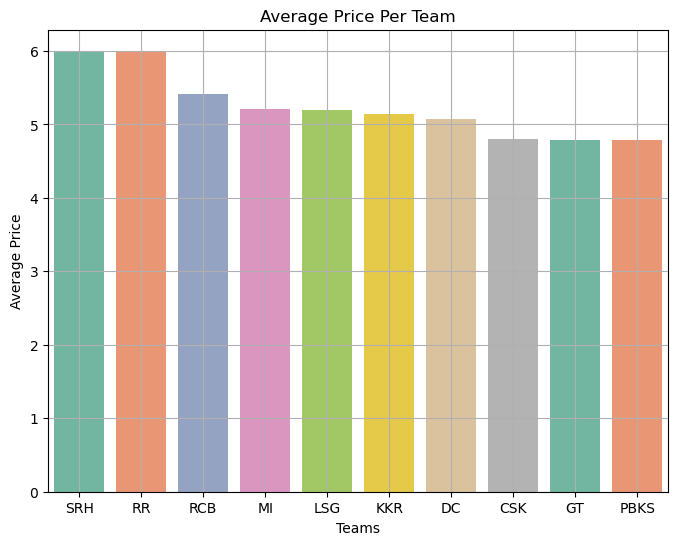

In [18]:
plt.figure(figsize=(8,6))
sns.barplot(average_price_per_team,palette='Set2')
plt.xlabel("Teams")
plt.ylabel("Average Price")
plt.title("Average Price Per Team")
plt.grid()
plt.show()

Visualizing Average Prices Per Player Type with a Bar Plot

/var/folders/m9/b2km3lkd033brz3977w48wjm0000gn/T/ipykernel_5839/1185864596.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(average_price_per_type,palette='Set1')


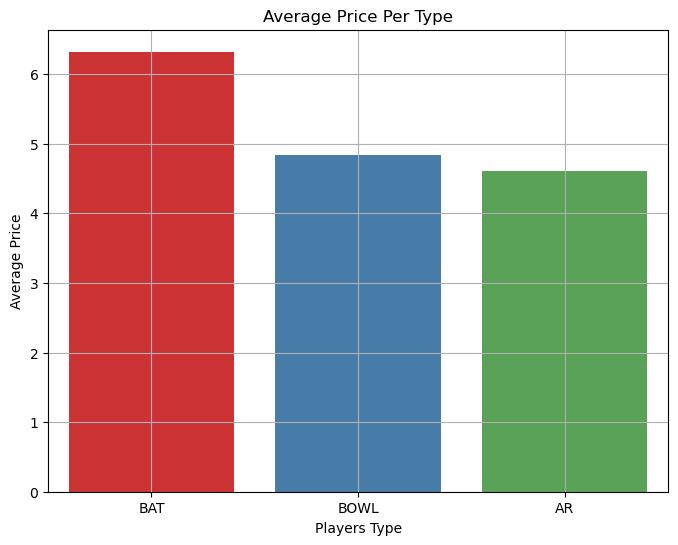

In [20]:
plt.figure(figsize=(8,6))
sns.barplot(average_price_per_type,palette='Set1')
plt.xlabel("Players Type")
plt.ylabel("Average Price")
plt.title("Average Price Per Type")
plt.grid()
plt.show()

Visualizing the Distribution of Prices with a Histogram

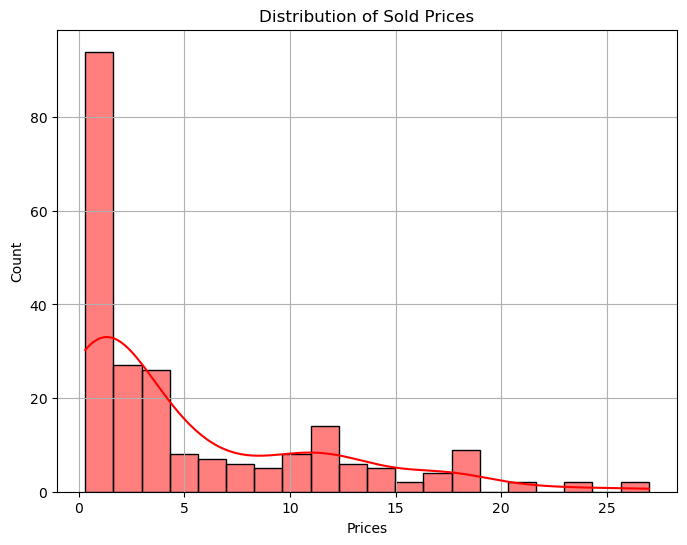

In [21]:
plt.figure(figsize=(8,6))
sns.histplot(df['Sold'],bins=20,kde=True,color='red')
plt.xlabel("Prices")
plt.ylabel("Count")
plt.title("Distribution of Players Sold Per Prices")
plt.grid()
plt.show()

Sorting and Extracting the Top 10 Highest Priced Players

In [22]:
top_10_highest_priced_players = df[['Players','Sold']].sort_values(by='Sold',ascending=False)[:10]

Visualizing the Top 10 Highest Priced IPL Players with a Bar Plot

/var/folders/m9/b2km3lkd033brz3977w48wjm0000gn/T/ipykernel_5839/1613084050.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sold',y='Players',data=top_10_highest_priced_players,palette='viridis')


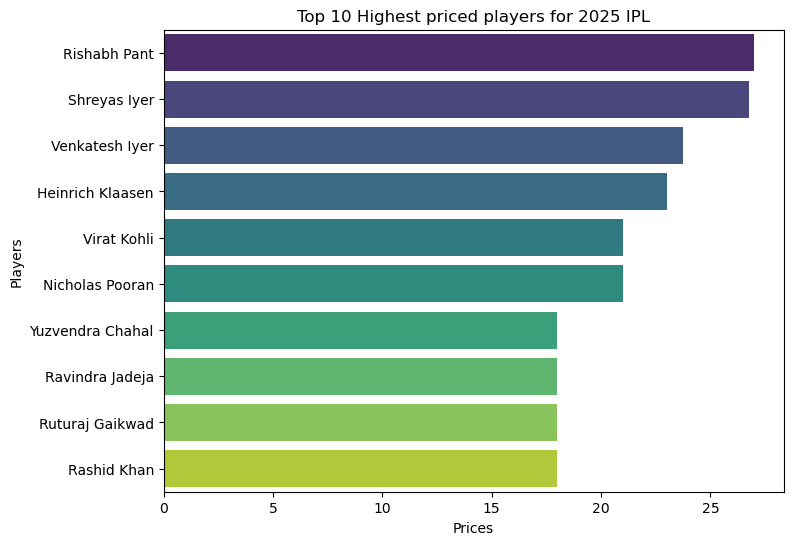

In [23]:
plt.figure(figsize=(8,6))
sns.barplot(x='Sold',y='Players',data=top_10_highest_priced_players,palette='viridis')
plt.xlabel("Prices")
plt.ylabel("Players")
plt.title("Top 10 Highest priced players for 2025 IPL")
plt.show()

In [24]:
player_count = df['Team'].value_counts()

Visualizing the Number of Players per Team with a Bar Plot

/var/folders/m9/b2km3lkd033brz3977w48wjm0000gn/T/ipykernel_5839/3796207672.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(player_count,palette='coolwarm')


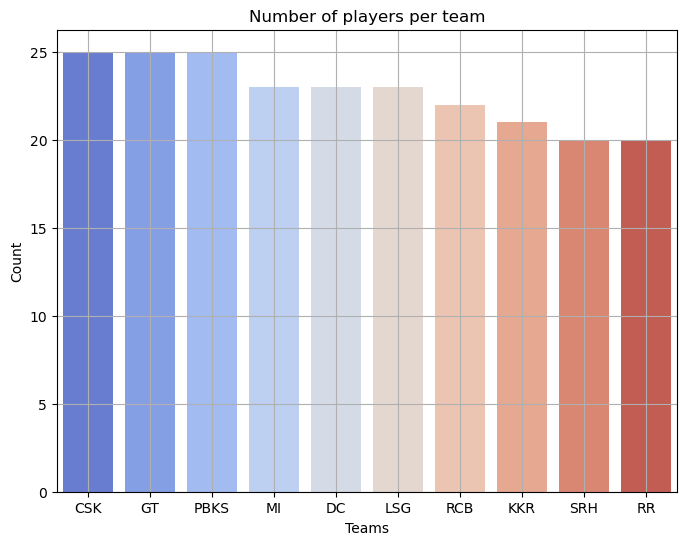

In [46]:
plt.figure(figsize=(8,6))
sns.barplot(player_count,palette='coolwarm')
plt.xlabel("Teams")
plt.ylabel("Count")
plt.title("Number of players per team")
plt.grid()
plt.show()

Filtering Data for Specific Team (CSK) Players

In [48]:
csk_players = df[df['Team']=='CSK']

In [50]:
csk_players_style=csk_players['Type'].value_counts()

Visualizing Player Styles for CSK with a Pie Chart

Text(0.5, 1.0, 'Player Styles for CSK')

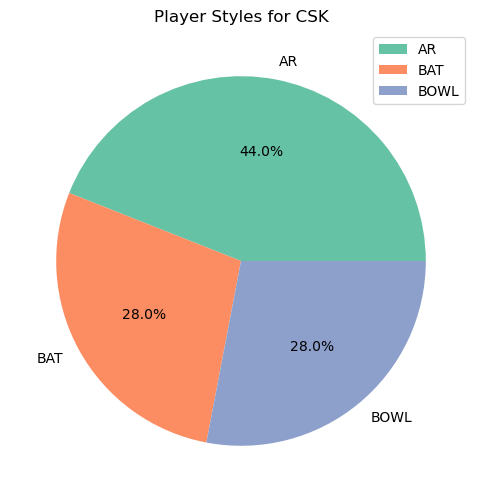

In [58]:
plt.figure(figsize=(8,6))
plt.pie(csk_players_style.values,labels=csk_players_style.index,autopct='%1.1f%%',colors=sns.color_palette('Set2'))
plt.legend()
plt.title('Player Styles for CSK')

 Visualizing the Distribution of CSK Players’ Prices with a Bar Plot

/var/folders/m9/b2km3lkd033brz3977w48wjm0000gn/T/ipykernel_5839/1476135742.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Players',y='Sold',data=csk_players,palette='viridis')


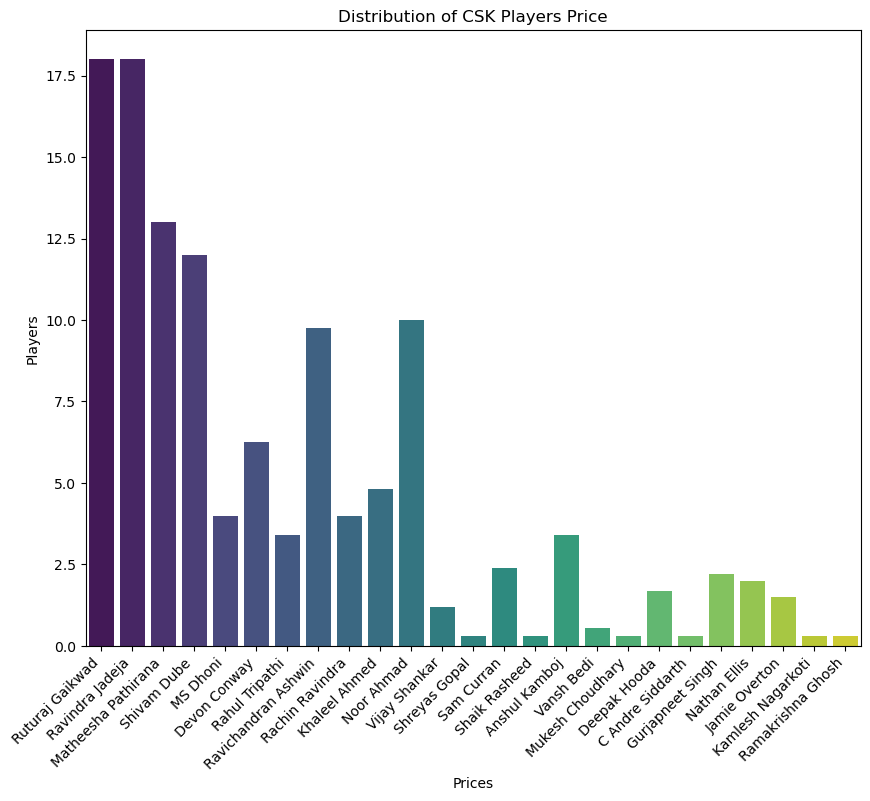

In [66]:
plt.figure(figsize=(10,8))
sns.barplot(x='Players',y='Sold',data=csk_players,palette='viridis')
plt.xlabel("Prices")
plt.ylabel("Players")
plt.xticks(rotation=45,ha='right')
plt.title("Distribution of CSK Players Price")
plt.show()